In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
from astropy import units as u
from astropy import constants as c

In [76]:
df = pd.read_csv('final_data')


Text(0.5, 1.0, 'Temperature Data, Uninterpolated')

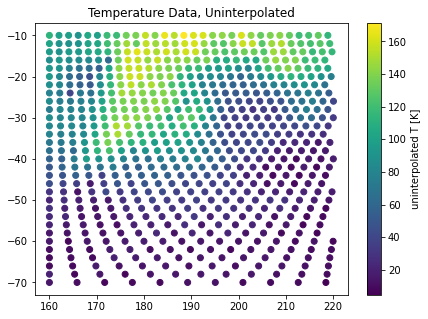

In [77]:
fig, ax = plt.subplots(figsize=(7, 5))
clrs = ax.scatter(df.l, df.b, c=df['T'])
fig.colorbar(clrs, label='uninterpolated T [K]')
ax.set_title('Temperature Data, Uninterpolated')

In [78]:
print(df['T'].min(), df['T'].max())
print(df['v'].min(), df['v'].max())
print(float(df.loc[df['T']== df['T'].min()].T_err), float(df.loc[df['T']==df['T'].max()].T_err))
print(float(df.loc[df['v']== df['v'].min()].v_err), float(df.loc[df['v']==df['v'].max()].v_err))

4.65112336720656 171.2857335557582
-1277.7573101569997 904.6056949960652
0.2046130929017866 1.3446539834359608
0.0005476015042468 0.0080311207877343


In [113]:
grid_l, grid_b = np.mgrid[df.l.min():df.l.max():200j, df.b.min():df.b.max():200j]
grid_x, grid_y = grid_l, grid_b
points = (np.array(df.l), np.array(df.b))
grid_T = interpolate.griddata(points, df['T'], (grid_x, grid_y), method='cubic')
grid_T = np.nan_to_num(grid_T, nan=grid_T[~np.isnan(grid_T)].mean())
grid_v = interpolate.griddata(points, df['v'], (grid_x, grid_y), method='cubic')
grid_v = np.nan_to_num(grid_v, nan=grid_v[~np.isnan(grid_v)].mean())
grid_σ = interpolate.griddata(points, df['σ'], (grid_x, grid_y), method='cubic')
grid_σ = np.nan_to_num(grid_σ, nan=grid_σ[~np.isnan(grid_σ)].mean())
grid_N = grid_σ*grid_T*1e18
grid_N = np.nan_to_num(grid_N, nan=grid_N[~np.isnan(grid_N)].mean())
grid_N = grid_N*u.cm**-2
scaled_T = ((grid_N-grid_N.min())/(grid_N.max()-grid_N.min())+1)/2


# grid_z01 = interpolate.griddata(points, T, (grid_x, grid_y), method='linear')
# grid_z02 = interpolate.griddata(points, T, (grid_x, grid_y), method='cubic')

In [120]:
grid_T_err = interpolate.griddata(points, df['T_err'], (grid_x, grid_y), method='nearest')
grid_T_err = np.nan_to_num(grid_T_err, nan=grid_T_err[~np.isnan(grid_T_err)].mean())
grid_v_err = interpolate.griddata(points, df['v_err'], (grid_x, grid_y), method='nearest')
grid_v_err = np.nan_to_num(grid_v_err, nan=0)
grid_σ_err = interpolate.griddata(points, df['σ_err'], (grid_x, grid_y), method='nearest')
# grid_σ_err = np.nan_to_num(grid_σ_err, nan=grid_σ_err[~np.isnan(grid_σ)].mean())
grid_N_err = grid_σ_err*grid_T_err*1e18
grid_N_err = grid_N.mean()*np.sqrt((grid_T_err/grid_T.mean())**2+(grid_σ_err/grid_σ.mean())**2)


# grid_N_err = np.nan_to_num(grid_N_err, nan=grid_N_err[~np.isnan(grid_N_err)].mean())
scaled_T_err = ((grid_T_err-grid_T_err.min())/(grid_T_err.max()-grid_T_err.min())+1)/2
scaled_v_err = ((grid_v_err-grid_v_err.min())/(grid_v_err.max()-grid_v_err.min())+1)/2
scaled_N_err = ((grid_N_err-grid_N_err.min())/(grid_N_err.max()-grid_N_err.min())+1)/2


<Quantity [[3.74514750e+19, 3.74514750e+19, 3.74514750e+19, ...,
            1.28221472e+20, 1.28221472e+20, 1.28221472e+20],
           [3.74514750e+19, 3.74514750e+19, 3.74514750e+19, ...,
            1.28221472e+20, 1.28221472e+20, 1.28221472e+20],
           [3.74514750e+19, 3.74514750e+19, 3.74514750e+19, ...,
            1.28221472e+20, 1.28221472e+20, 1.28221472e+20],
           ...,
           [1.62797516e+19, 1.62797516e+19, 1.62797516e+19, ...,
            9.57256386e+19, 9.57256386e+19, 9.57256386e+19],
           [1.62797516e+19, 1.62797516e+19, 1.62797516e+19, ...,
            9.57256386e+19, 9.57256386e+19, 9.57256386e+19],
           [1.62797516e+19, 1.62797516e+19, 1.62797516e+19, ...,
            9.57256386e+19, 9.57256386e+19, 9.57256386e+19]] 1 / cm2>

Text(0.5, 1.0, 'Column Density scaled by Error')

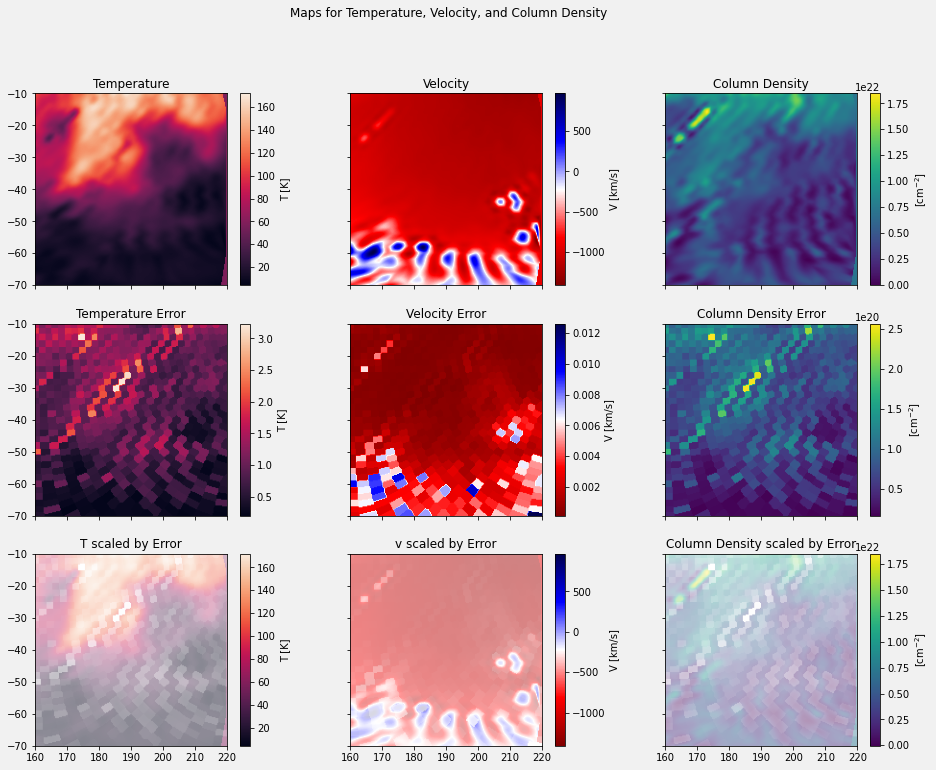

In [98]:
fig, ax = plt.subplots(figsize=[16, 12], facecolor='#f1f1f1', ncols=3, nrows=3, squeeze=True, sharex=True, sharey=True)
im1 = ax[0, 0].imshow(grid_T.T, cmap='rocket', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im1, label='T [K]', ax=ax[0, 0])
ax[0, 0].set_title('Temperature')
im2 = ax[0, 1].imshow(grid_v.T, cmap='seismic_r', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im2, label='V [km/s]', ax=ax[0, 1])
ax[0, 1].set_title('Velocity')
im3 = ax[0, 2].imshow(grid_N.T, cmap='viridis', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im3, label=r'[cm$^{-2}$]', ax=ax[0, 2])
ax[0, 2].set_title('Column Density')
fig.suptitle('Maps for Temperature, Velocity, and Column Density')
im4 = ax[1, 0].imshow(grid_T_err.T, cmap='rocket', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im4, label='T [K]', ax=ax[1, 0])
ax[1, 0].set_title('Temperature Error')
im5 = ax[1, 1].imshow(grid_v_err.T, cmap='seismic_r', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im5, label='V [km/s]', ax=ax[1, 1])
ax[1, 1].set_title('Velocity Error')
im6 = ax[1, 2].imshow(grid_N_err.T, cmap='viridis', origin='lower', extent=[160, 220, -70, -10])
fig.colorbar(im6, label=r'[cm$^{-2}$]', ax=ax[1, 2])
ax[1, 2].set_title('Column Density Error')
im4 = ax[2, 0].imshow(grid_T.T, cmap='rocket', origin='lower', extent=[160, 220, -70, -10], alpha=1-scaled_T_err.T)
fig.colorbar(im4, label='T [K]', ax=ax[2, 0])
ax[2, 0].set_title('T scaled by Error')
im5 = ax[2, 1].imshow(grid_v.T, cmap='seismic_r', origin='lower', extent=[160, 220, -70, -10], alpha=1-scaled_v_err.T)
fig.colorbar(im5, label='V [km/s]', ax=ax[2, 1])
ax[2, 1].set_title('v scaled by Error')
im6 = ax[2, 2].imshow(grid_N.T, cmap='viridis', origin='lower', extent=[160, 220, -70, -10], alpha=1-scaled_N_err.T)
fig.colorbar(im6, label=r'[cm$^{-2}$]', ax=ax[2, 2])
ax[2, 2].set_title('Column Density scaled by Error')

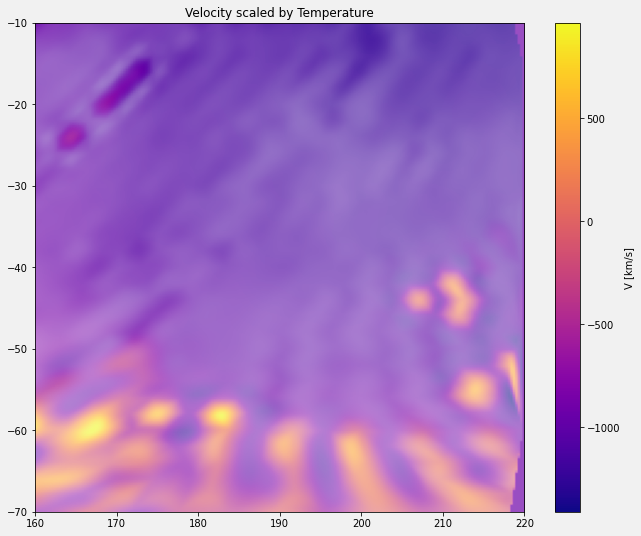

In [82]:
fig, ax = plt.subplots(figsize=[11, 9], facecolor='#f1f1f1', squeeze=True, sharex=True, sharey=True)
ax.set_title('Velocity scaled by Temperature')
im2 = ax.imshow(grid_v.T, cmap='plasma', origin='lower', extent=[160, 220, -70, -10], alpha=scaled_T.T)
fig.colorbar(im2, label='V [km/s]')

In [108]:
d = 290*u.pc #assuming a constant distance of 400 pc
dlow = 180
dhigh = 400
d_err = (400-110)/2*u.pc
beam_angle = ((4*u.deg)**2).to(u.sr) #assumes a beam angle of 4 degrees by 4 degrees
area_array = np.ones([200, 200])*d**2*beam_angle
# MHI = (1.8e18*(u.K**-1*u.rad**-2)*(grid_σ)*c.u*(grid_T*u.K)*beam_angle).cgs
# MHI.sum()

In [123]:
M = (grid_N.mean()*4*np.pi*d.to(u.cm)**2*c.u*((220-160)/360)*(60/180)).cgs.to(u.M_sun)
# (grid_N_err.mean()*4*np.pi*d.to(u.cm)**2*c.u*((220-160)/360)*(60/180)).cgs.to(u.M_sun)

M

<Quantity 2162282.99475123 solMass>

In [129]:
# error propagation
M_err = M*np.sqrt(np.mean(grid_N_err/grid_N.mean())+2*(d_err/d)**2)
M_err

<Quantity 1552565.01720603 solMass>

l goes from 0 to 360
b goes from -90 to 90